# Imports and Preprocess

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
import pathlib
data_dir = pathlib.Path(r'C:\Users\ASUS\Documents\11_Summer 23\CSE438-Digital Image Processing\Codes\EMDS-6\EMDS5-Original')
data_dir

WindowsPath('C:/Users/ASUS/Documents/11_Summer 23/CSE438-Digital Image Processing/Codes/EMDS-6/EMDS5-Original')

In [4]:
img_count = len(list(data_dir.glob('*/*.png')))
img_count

840

In [5]:
img_path_dict = {
"Actinophrys": list(data_dir.glob('Actinophrys/*.png')),
 "Arcella" : list(data_dir.glob("Arcella/*")),
 "Aspidisca": list(data_dir.glob("Aspidisca/*")),
 "Codosiga": list(data_dir.glob("Codosiga/*")),
 "Colpoda": list(data_dir.glob("Colpoda/*")),
 "Epistylis": list(data_dir.glob("Epistylis/*")),
 "Euglypha": list(data_dir.glob("Euglypha/*")),
 "Paramecium" : list(data_dir.glob("Paramecium/*")),
 "Rotifera" : list(data_dir.glob("Rotifera/*")),
 "Vorticella" : list(data_dir.glob("Vorticella/*")),
 "Noctiluca" : list(data_dir.glob("Noctiluca/*")),
 "Ceratium" : list(data_dir.glob("Ceratium/*")),	
 "Stentor" : list(data_dir.glob("Stentor/*")),
 "Siprostomum" : list(data_dir.glob("Siprostomum/*")),
 "Keratella Quadrala" : list(data_dir.glob("Keratella Quadrala/*")),
 "Euglena" : list(data_dir.glob("Euglena/*")),
 "Gymnodinium" : list(data_dir.glob("Gymnodinium/*")),
 "Gonyaulax" : list(data_dir.glob("Gonyaulax/*")),
 "Phacus" : list(data_dir.glob("Phacus/*")),
 "Stylongchia" : list(data_dir.glob("Stylongchia/*")),
 "Synchaeta" : list(data_dir.glob("Synchaeta/*"))
}


In [6]:
img_label_dict = {
"Actinophrys": 0,
 "Arcella" : 1,
 "Aspidisca": 2,
 "Codosiga": 3,	
 "Colpoda": 4,	
 "Epistylis": 5,
 "Euglypha": 6,
 "Paramecium" : 7,
 "Rotifera" : 8,
 "Vorticella" : 9,
 "Noctiluca" : 10,
 "Ceratium" : 11,
 "Stentor" :  12,
 "Siprostomum" : 13,
 "Keratella Quadrala" : 14,
 "Euglena" : 15,
 "Gymnodinium" : 16,
 "Gonyaulax" : 17,
 "Phacus" : 18,
 "Stylongchia" : 19,
 "Synchaeta" : 20
}

In [7]:
img_path_dict['Actinophrys'][0]

WindowsPath('C:/Users/ASUS/Documents/11_Summer 23/CSE438-Digital Image Processing/Codes/EMDS-6/EMDS5-Original/Actinophrys/EMDS5-g01-01.png')

In [8]:
img = cv2.imread(str(img_path_dict['Actinophrys'][0]))
img.shape

(338, 507, 3)

In [9]:
cv2.resize(img, (224,224)).shape

(224, 224, 3)

In [10]:
X, y = [], []
for name, images in img_path_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img)
        y.append(img_label_dict[name])

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [13]:
print(len(X_train))
print(len(X_test))

672
168


In [14]:
# scaling
X_train_scaled = X_train/224
X_test_scaled = X_test/224

# RAW CNN model

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models


model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for Dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(21, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/30
21/21 [==============================] - 8s 171ms/step - loss: 3.1832 - accuracy: 0.0565 - val_loss: 3.0116 - val_accuracy: 0.0655
Epoch 2/30
21/21 [==============================] - 3s 145ms/step - loss: 2.8960 - accuracy: 0.1146 - val_loss: 2.8927 - val_accuracy: 0.2262
Epoch 3/30
21/21 [==============================] - 3s 139ms/step - loss: 2.5651 - accuracy: 0.2247 - val_loss: 2.8358 - val_accuracy: 0.2143
Epoch 4/30
21/21 [==============================] - 3s 139ms/step - loss: 2.1442 - accuracy: 0.3557 - val_loss: 2.8186 - val_accuracy: 0.1905
Epoch 5/30
21/21 [==============================] - 3s 142ms/step - loss: 1.8308 - accuracy: 0.4568 - val_loss: 3.0159 - val_accuracy: 0.2262
Epoch 6/30
21/21 [==============================] - 3s 141ms/step - loss: 1.6027 - accuracy: 0.5253 - val_loss: 3.3033 - val_accuracy: 0.2738
Epoch 7/30
21/21 [==============================] - 3s 151ms/step - loss: 1.1774 - accuracy: 0.6473 - val_loss: 3.3464 - val_accuracy: 0.2619
Epoch 

6/6 [==============================] - 0s 73ms/step
MobileNet Accuracy: 0.2916666666666667

MobileNet Report:
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.33      0.44      0.38         9
           2       0.25      0.50      0.33         4
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         5
           5       0.20      0.12      0.15         8
           6       0.50      0.31      0.38        13
           7       0.33      0.18      0.24        11
           8       0.09      0.17      0.12         6
           9       0.00      0.00      0.00         6
          10       0.29      0.22      0.25         9
          11       0.56      0.56      0.56         9
          12       0.75      0.25      0.38        12
          13       0.11      0.50      0.18         4
          14       0.17      0.17      0.17         6
          15       0.29  

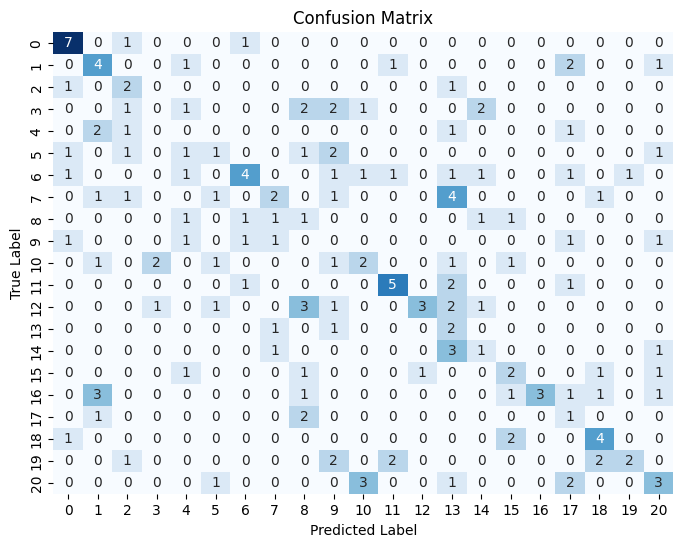

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
predictions = np.argmax(model.predict(X_test), axis=-1)

acc = np.sum(predictions == y_test) / len(y_test)
print('MobileNet Accuracy:', acc)

print('\nMobileNet Report:')
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',cbar=False, cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# VGG16

In [25]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the pretrained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False
    
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(224, activation='relu')(x)
output = Dense(21, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_test, y_test)
)


Epoch 1/30


ResourceExhaustedError: Graph execution error:

Detected at node 'model_3/block1_conv1/Relu' defined at (most recent call last):
    File "c:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_23336\1658249306.py", line 23, in <module>
      history = model.fit(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'model_3/block1_conv1/Relu'
OOM when allocating tensor with shape[10,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_3/block1_conv1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_61512]

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
predictions = np.argmax(model.predict(X_test), axis=-1)

acc = np.sum(predictions == y_test) / len(y_test)
print('MobileNet Accuracy:', acc)

print('\nMobileNet Report:')
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',cbar=False, cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ResourceExhaustedError: Graph execution error:

Detected at node 'model_1/block1_conv1/Relu' defined at (most recent call last):
    File "c:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_23336\3413894699.py", line 5, in <module>
      predictions = np.argmax(model.predict(X_test), axis=-1)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'model_1/block1_conv1/Relu'
OOM when allocating tensor with shape[32,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_1/block1_conv1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_19081]

# Mobile Net V2

In [21]:
#MOBILE NET
from tensorflow.keras.callbacks import LearningRateScheduler

import tensorflow_hub as hub
classifier = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")])
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

num_of_classes = 21

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

# def lr_schedule(epoch, lr):
#     if epoch < 30:
#         return lr
#     else:
#         return lr * tf.math.exp(-0.1)

# lr_scheduler = LearningRateScheduler(lr_schedule)
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(
  optimizer= "adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test) , epochs=50)


Epoch 1/50
21/21 [==============================] - 4s 85ms/step - loss: 2.7613 - acc: 0.2083 - val_loss: 2.0199 - val_acc: 0.4524
Epoch 2/50
21/21 [==============================] - 1s 58ms/step - loss: 1.3083 - acc: 0.7158 - val_loss: 1.2726 - val_acc: 0.6726
Epoch 3/50
21/21 [==============================] - 1s 60ms/step - loss: 0.7603 - acc: 0.8482 - val_loss: 0.8875 - val_acc: 0.8036
Epoch 4/50
21/21 [==============================] - 1s 57ms/step - loss: 0.4943 - acc: 0.9256 - val_loss: 0.7329 - val_acc: 0.8333
Epoch 5/50
21/21 [==============================] - 1s 56ms/step - loss: 0.3576 - acc: 0.9583 - val_loss: 0.6389 - val_acc: 0.8274
Epoch 6/50
21/21 [==============================] - 1s 57ms/step - loss: 0.2728 - acc: 0.9792 - val_loss: 0.5642 - val_acc: 0.8452
Epoch 7/50
21/21 [==============================] - 1s 56ms/step - loss: 0.2190 - acc: 0.9866 - val_loss: 0.5391 - val_acc: 0.8690
Epoch 8/50
21/21 [==============================] - 1s 56ms/step - loss: 0.1763 - a

In [22]:
model.evaluate(X_test_scaled,y_test)

6/6 [==============================] - 0s 38ms/step - loss: 0.2894 - acc: 0.9167


[0.2893540859222412, 0.9166666865348816]

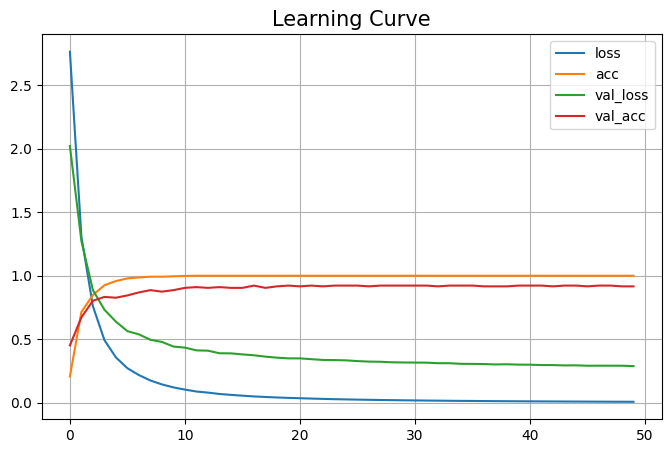

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Learning Curve", fontsize=15)
plt.grid()
plt.show()

In [ ]:
# model.save("mobilenet.h5")

Save and Load Previous model

In [ ]:
import tensorflow_hub as hub
my_reloaded_model = tf.keras.models.load_model(
       ("./mobilenet.h5"),
       custom_objects={'KerasLayer':hub.KerasLayer}
)
my_reloaded_model.summary()
my_reloaded_model.evaluate(X_test_scaled,y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 21)                26901     
                                                                 
Total params: 2,284,885
Trainable params: 26,901
Non-trainable params: 2,257,984
_________________________________________________________________
11/11 [==============================] - 6s 43ms/step - loss: 0.1492 - acc: 0.9732


[0.14917129278182983, 0.9732142686843872]

# Resnet

In [15]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the pretrained ResNet50 model (excluding the top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(224, activation='relu')(x)
output = Dense(21, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming you have X_train and y_train data
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_test, y_test)
)


Epoch 1/30


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


68/68 [==============================] - 7s 72ms/step - loss: 10.0762 - accuracy: 0.4345 - val_loss: 4.9296 - val_accuracy: 0.5536
Epoch 2/30
68/68 [==============================] - 4s 58ms/step - loss: 1.2936 - accuracy: 0.8557 - val_loss: 3.3974 - val_accuracy: 0.6786
Epoch 3/30
68/68 [==============================] - 4s 57ms/step - loss: 0.5195 - accuracy: 0.9137 - val_loss: 4.3082 - val_accuracy: 0.6786
Epoch 4/30
68/68 [==============================] - 4s 57ms/step - loss: 0.3499 - accuracy: 0.9464 - val_loss: 4.1662 - val_accuracy: 0.6548
Epoch 5/30
68/68 [==============================] - 4s 57ms/step - loss: 0.2591 - accuracy: 0.9658 - val_loss: 4.6229 - val_accuracy: 0.6369
Epoch 6/30
68/68 [==============================] - 4s 57ms/step - loss: 0.2770 - accuracy: 0.9613 - val_loss: 5.6852 - val_accuracy: 0.5774
Epoch 7/30
68/68 [==============================] - 4s 57ms/step - loss: 0.1342 - accuracy: 0.9717 - val_loss: 4.9636 - val_accuracy: 0.6607
Epoch 8/30
68/68 [=====